# Abstract


This project is for wrangling data. There are three data sets. Two of them are given by Udacity (which are 'twitter-archive-enhanced.csv, image-predictions.tsv), one of them can be taken through 'twitter-API' which is about retweet counts and favorite counts. Those data sets are not cleaned yet. In other words, Those are dirty and messy. We should clean them. 

# Gather

In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
from timeit import default_timer as timer
pd.set_option('display.max_rows', 7)

# change the CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET by yours
consumer_key = 'CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#### Load the WeRateDogs twitter archive

In [2]:
df_twit_archive_raw = pd.read_csv('twitter-archive-enhanced.csv')
df_twit_archive_raw.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Load the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [3]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predic_raw = pd.read_csv(image_predictions_url, sep='\t')
df_image_predic_raw.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Each tweet's retweet count and favorite ("like") count at minimum. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line.

In [4]:
'''tweet_ids = df_twit_archive.tweet_id.values

fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            api_status = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(api_status._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)'''

'tweet_ids = df_twit_archive.tweet_id.values\n\nfails_dict = {}\nstart = timer()\n\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        try:\n            api_status = api.get_status(tweet_id, tweet_mode=\'extended\')\n            json.dump(api_status._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\n        \nend = timer()\nprint(end - start)\nprint(fails_dict)'

In [5]:
df_twit_add_raw = pd.read_json('tweet_json.txt', lines=True)

# Assess

Before cleaning, I copied DataFrame to preserve original DataFrame. I solved eight Quality issues first and then tidienss issues. Some of them have been made through visual assessment by Excel, others have been made through programmatic assessment. I've made some useful function in order to clean DataFrame effectively. I could find all of library's function through documents and stackoverflow. Finally, I exported the cleaned DataFrame to a csv file

copy the DataFrame

In [6]:
df_twit_archive = df_twit_archive_raw.copy()

In [7]:
df_twit_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [8]:
df_image_predic = df_image_predic_raw.copy()

In [9]:
df_image_predic.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [10]:
df_twit_add = df_twit_add_raw.copy()

In [11]:
df_twit_add.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37511,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8176,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_twit_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2336 non-null datetime64[ns]
display_text_range               2336 non-null object
entities                         2336 non-null object
extended_entities                2065 non-null object
favorite_count                   2336 non-null int64
favorited                        2336 non-null bool
full_text                        2336 non-null object
geo                              0 non-null float64
id                               2336 non-null int64
id_str                           2336 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [15]:
df_twit_archive.name.value_counts()

None       745
a           55
Charlie     12
          ... 
Charl        1
Chubbs       1
Gilbert      1
Name: name, Length: 957, dtype: int64

In [16]:
df_twit_archive.query("name =='a'").text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
                              ...                        
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
Name: text, Length: 55, dtype: object

In [17]:
df_twit_archive.query('name in ["a", "an", "the", "such"]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality Issues

#### df_twit_archive table
- Null value in expanded_urls
- There are useless rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,	retweeted_status_timestamp] are useless columns
- The type of timestamp is object
- There are rows whose name == a, an, the, such
- The rating_numerator is represented by an integer whose rating is a decimal point.
- rating_denominator is not 10
- rating_denominator and rating_numerator can be combined in one column
- expanded_url has rows with multiple URLs


### Tidiness Issues
#### df_twit_archive table
- 1 variable in 4 columns in df_twit_archive table (doggo, floofer, pupper, puppo)

#### df_twit_add table
- Attach favorite_count, retweet_count of df_twit_add to df_twit_archive

#### df_image_predic table
- Attach p1, p1_conf, p1_dog of df_image_predic to df_twit_archive

# Clean

### Quality Issues

**`df_twit_archive`: Null value in expanded_urls**

***Define***

Drop the rows with expanded_urls is Null

***Cdoe***

In [18]:
df_twit_archive.dropna(subset=['tweet_id','expanded_urls'], inplace=True)
df_twit_archive.reset_index(drop=True, inplace=True)

***Test***

In [19]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

**`df_twit_archive`: There are useless rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp**

***Define***

Remove rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp from df_twit_archive

***Code***

In [20]:
retweeted_index = df_twit_archive.query('retweeted_status_id != "NaN"').index
retweeted_index

Int64Index([  19,   31,   35,   65,   70,   71,   75,   88,   92,   94,
            ...
             894,  905,  911,  917,  978,  989, 1009, 1207, 2201, 2202],
           dtype='int64', length=180)

In [21]:
df_twit_archive.drop(retweeted_index, axis=0, inplace=True)
df_twit_archive.reset_index(drop=True, inplace=True)

***Test***

In [22]:
df_twit_archive.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**`df_twit_archive`: [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] are useless columns**

***Define***

Delete useless [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,	retweeted_status_timestamp] columns

In [23]:
df_twit_archive.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


***Code***

In [24]:
df_twit_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

***Test***

In [25]:
df_twit_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**`df_twit_archive`: The type of timestamp is object**

***Define***

Change type of timestamp to datatime64

***code***

In [26]:
df_twit_archive.timestamp = df_twit_archive.timestamp.astype('datetime64')

***Test***

In [27]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 198.5+ KB


**`df_twit_archive`: There are rows whose name == a, an, the, such**

***Define***

First, find the text of rows which name is 'a, an, the, such'.

If text has the word 'named', replace the name with the word immediately after it.
Otherwise, replace the name with None.

***code***

In [28]:
df_twit_wrong_name = df_twit_archive.query('name in ["a", "an", "the", "such"]')
df_twit_wrong_name

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
51,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
497,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2113,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2115,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [29]:
def get_correct_name(text):
    split_list = text.split()
    if 'named' in split_list:
        name_index = split_list.index('named') + 1
        name = split_list[name_index]
        return name
    else:
        return None    

In [30]:
df_twit_wrong_name['correct_name'] = df_twit_wrong_name.apply(lambda x: get_correct_name(x['text']), axis=1)

C:\Users\weroo\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_twit_wrong_name

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_name
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None,None
51,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,None
497,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,None
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,None
2115,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,None


In [32]:
df_twit_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [33]:
correct_name_dic = {}
for index, row in df_twit_wrong_name.iterrows():
    correct_name_dic[row.tweet_id] = row.correct_name
correct_name_dic

{887517139158093824: None,
 881536004380872706: None,
 792913359805018113: None,
 772581559778025472: None,
 747885874273214464: None,
 747816857231626240: None,
 746872823977771008: None,
 746369468511756288: None,
 743222593470234624: None,
 717537687239008257: None,
 715733265223708672: None,
 704859558691414016: None,
 704054845121142784: None,
 703079050210877440: None,
 703041949650034688: None,
 702539513671897089: None,
 700864154249383937: None,
 692187005137076224: None,
 690360449368465409: None,
 685943807276412928: None,
 679530280114372609: None,
 677644091929329666: None,
 677269281705472000: None,
 676613908052996102: None,
 675706639471788032: 'Wylie.',
 675534494439489536: None,
 675109292475830276: None,
 675047298674663426: None,
 674082852460433408: None,
 673715861853720576: None,
 673636718965334016: 'Kip.',
 672604026190569472: None,
 671743150407421952: 'Jacob',
 671561002136281088: None,
 671147085991960577: 'Rufus.',
 670427002554466305: 'Spork.',
 6703618748

In [34]:
name_column_index = list(df_twit_archive.columns).index('name')
name_column_index

7

In [35]:
name_column_index = list(df_twit_archive.columns).index('name')
for index, row in df_twit_archive.iterrows():
    if row['tweet_id'] in correct_name_dic.keys():
        df_twit_archive.iloc[index, name_column_index] = correct_name_dic[row.tweet_id]

***Test***

In [36]:
df_twit_archive.query('name in ["a", "an", "the", "such"]')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**`df_twit_archive`: The rating_numerator is represented by an integer whose rating is a decimal point.**

***Define***

In the text column of df_twit_archive table, extract the rating of 00.0 / 00 type using regex and modify rating_numerator type to 00.0

***Code***

In [37]:
series_with_regex = df_twit_archive.text.str.extract('((\d+\.)?\d+)\/(\d+)', expand=True)

In [38]:
series_with_regex.dropna()

,0,1,2
41,13.5,13.,10
531,9.75,9.,10
588,11.27,11.,10
1486,11.26,11.,10


In [39]:
rating_numerator_index = 5
df_twit_archive.iloc[40, rating_numerator_index] = 13.5
df_twit_archive.iloc[549, rating_numerator_index] = 9.75
df_twit_archive.iloc[605, rating_numerator_index] = 11.27
df_twit_archive.iloc[1429, rating_numerator_index] = 11.26

***Test***

In [40]:
df_twit_archive.iloc[40].rating_numerator, df_twit_archive.iloc[549].rating_numerator, df_twit_archive.iloc[605].rating_numerator, df_twit_archive.iloc[1429].rating_numerator

(13.5, 9.75, 11.27, 11.26)

**`df_twit_archive`: rating_denominator is not 10**

***Define***

drop the rows with rating_denominator != 10

***Code***

In [41]:
index_of_not_having_10_denominator = df_twit_archive.query('rating_denominator != 10').index
df_twit_archive.drop(index_of_not_having_10_denominator, inplace=True)

***Test***

In [42]:
df_twit_archive.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**`df_twit_archive`: rating_denominator and rating_numerator can be combined in one column**

***Define***

Evaluate rating_numerator / rating_denominator and save it as rating, delete rating_numerator and rating_denominator

In [43]:
df_twit_archive['rating'] = df_twit_archive.rating_numerator / df_twit_archive.rating_denominator

In [44]:
df_twit_archive.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

***Test***

In [45]:
df_twit_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3


**`df_twit_archive`: expanded_url has rows with multiple URLs**

***Define***

remove duplicated URLs from expanded_url column.
For example, urls = 'a,a,a' then, extract 'a' only

***Code***

In [46]:
def delete_duplicated_urls(url):
    first_url = url.split(',')[0]
    return first_url  

In [47]:
df_twit_archive['correct_expanded_urls'] = df_twit_archive.apply(lambda x: delete_duplicated_urls(x['expanded_urls']), axis=1)

In [48]:
df_twit_archive.drop('expanded_urls', axis=1, inplace=True)

***Test***

In [49]:
df_twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2116
Data columns (total 11 columns):
tweet_id                 2099 non-null int64
timestamp                2099 non-null datetime64[ns]
source                   2099 non-null object
text                     2099 non-null object
name                     2051 non-null object
doggo                    2099 non-null object
floofer                  2099 non-null object
pupper                   2099 non-null object
puppo                    2099 non-null object
rating                   2099 non-null float64
correct_expanded_urls    2099 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 196.8+ KB


In [50]:
for index, row in df_twit_archive.iterrows():
    if len(row['correct_expanded_urls'].split(',')) > 1:
        print(row['correct_expanded_urls'])

**`df_twit_archive`: 1 variable in 4 columns in df_twit_archive table (doggo, floofer, pupper, puppo)

***Define***

Change doggo, floofer, pupper, puppo columns to kinds column

***Code***

In [51]:
df_twit_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1761
1,None,None,None,puppo,23
2,None,None,pupper,None,222
...,...,...,...,...,...
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [52]:
df_twit_archive.doggo.replace('None', '', inplace=True)
df_twit_archive.doggo.replace(np.NaN, '', inplace=True)
df_twit_archive.floofer.replace('None', '', inplace=True)
df_twit_archive.floofer.replace(np.NaN, '', inplace=True)
df_twit_archive.pupper.replace('None', '', inplace=True)
df_twit_archive.pupper.replace(np.NaN, '', inplace=True)
df_twit_archive.puppo.replace('None', '', inplace=True)
df_twit_archive.puppo.replace(np.NaN, '', inplace=True)

In [53]:
df_twit_archive['stage'] = df_twit_archive.doggo + df_twit_archive.floofer + df_twit_archive.pupper + df_twit_archive.puppo
df_twit_archive.loc[df_twit_archive.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_twit_archive.loc[df_twit_archive.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_twit_archive.loc[df_twit_archive.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [54]:
df_twit_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

***Test***

In [55]:
df_twit_archive.stage.value_counts()

                 1761
pupper            222
doggo              72
                 ... 
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, Length: 8, dtype: int64

In [56]:
df_twit_archive

,tweet_id,timestamp,source,text,name,rating,correct_expanded_urls,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,https://twitter.com/dog_rates/status/892420643...,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,1.3,https://twitter.com/dog_rates/status/892177421...,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,https://twitter.com/dog_rates/status/891815181...,
...,...,...,...,...,...,...,...,...
2114,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,None,0.9,https://twitter.com/dog_rates/status/666033412...,
2115,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,None,0.7,https://twitter.com/dog_rates/status/666029285...,
2116,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,None,0.8,https://twitter.com/dog_rates/status/666020888...,


**`df_twit_add`: Attach favorite_count, retweet_count of df_twit_add to df_twit_archive**

***Define***

Attach only favorite count and retwit count columns of df_twit_add to df_twit_archive based on tweet_id

***Code***

In [57]:
df_twit_add.rename(columns={'id': 'tweet_id'}, inplace=True)

In [58]:
df_twit_archive = df_twit_archive.merge(df_twit_add)

df_twit_add_columns = list(df_twit_add.columns)
df_twit_add_columns.remove('tweet_id')
df_twit_add_columns.remove('favorite_count')
df_twit_add_columns.remove('retweet_count')


df_twit_archive.drop(columns=df_twit_add_columns, inplace=True)

***Test***

In [59]:
df_twit_archive

,tweet_id,timestamp,text,name,rating,correct_expanded_urls,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,https://twitter.com/dog_rates/status/892420643...,,37511,8176
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,https://twitter.com/dog_rates/status/892177421...,,32256,6051
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,https://twitter.com/dog_rates/status/891815181...,,24298,4003
...,...,...,...,...,...,...,...,...,...
2092,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,None,0.9,https://twitter.com/dog_rates/status/666033412...,,120,43
2093,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,None,0.7,https://twitter.com/dog_rates/status/666029285...,,124,46
2094,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,None,0.8,https://twitter.com/dog_rates/status/666020888...,,2503,493


**`df_image_predic`: Attach p1, p1_conf, p1_dog of df_image_predic to df_twit_archive**

***Define***

Attach df_image_predic to df_twit_archive (p1, p1_conf, p1_dog only)

***Code***

In [60]:
df_twit_archive = pd.merge(df_twit_archive, df_image_predic)
df_twit_archive

,tweet_id,timestamp,text,name,rating,correct_expanded_urls,stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,https://twitter.com/dog_rates/status/892420643...,,37511,8176,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,https://twitter.com/dog_rates/status/892177421...,,32256,6051,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,https://twitter.com/dog_rates/status/891815181...,,24298,4003,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,None,0.9,https://twitter.com/dog_rates/status/666033412...,,120,43,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1970,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,None,0.7,https://twitter.com/dog_rates/status/666029285...,,124,46,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1971,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,None,0.8,https://twitter.com/dog_rates/status/666020888...,,2503,493,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [61]:
df_image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [62]:
df_twit_archive.drop(columns=['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

***Test***

In [63]:
df_twit_archive

,tweet_id,timestamp,text,name,rating,correct_expanded_urls,stage,favorite_count,retweet_count,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,https://twitter.com/dog_rates/status/892420643...,,37511,8176,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,1.3,https://twitter.com/dog_rates/status/892177421...,,32256,6051,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,https://twitter.com/dog_rates/status/891815181...,,24298,4003,Chihuahua,0.716012,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1969,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,None,0.9,https://twitter.com/dog_rates/status/666033412...,,120,43,German_shepherd,0.596461,True
1970,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,None,0.7,https://twitter.com/dog_rates/status/666029285...,,124,46,redbone,0.506826,True
1971,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,None,0.8,https://twitter.com/dog_rates/status/666020888...,,2503,493,Welsh_springer_spaniel,0.465074,True


# Analysis

#### The largest number of breeds on WeRateDogs (with a confidence of more than 70% for accuracy and p1_dog being true)

In [64]:
df_believable_dog = df_twit_archive.query('p1_conf >= 0.7 and p1_dog == True')
series_breeds = df_believable_dog.p1.value_counts()
series_breeds[:15]

golden_retriever            83
Pembroke                    51
Labrador_retriever          44
                            ..
cocker_spaniel              10
Shetland_sheepdog            8
Chesapeake_Bay_retriever     8
Name: p1, Length: 15, dtype: int64

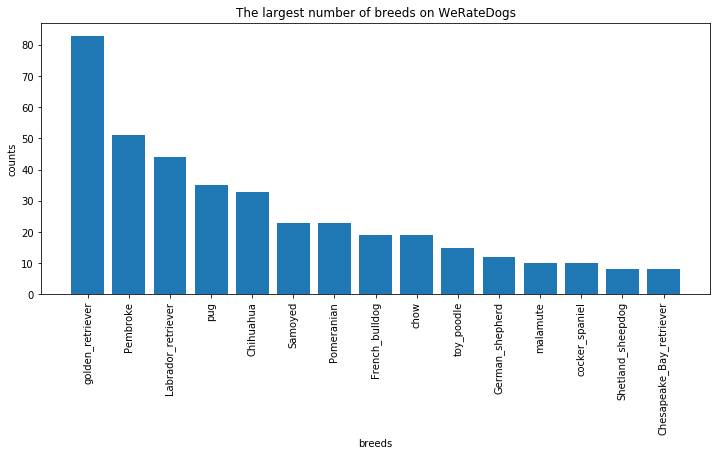

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,5));
plt.bar(x=series_breeds[:15].index, height=series_breeds[:15]);
plt.xlabel('breeds')
plt.ylabel('counts')
plt.title('The largest number of breeds on WeRateDogs')
plt.xticks(rotation=90);

There are much more Golden retriever than other breeds. The next many breeds are Pembroke, Labrador retriever, and Chihuahua.

In [66]:
df_twit_archive.describe()

,tweet_id,rating,favorite_count,retweet_count,p1_conf
count,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000
mean,7.359168e+17,1.169867,8595.159736,2600.624239,0.593051
std,6.758359e+16,4.089260,12622.476979,4649.741849,0.271938
...,...,...,...,...,...
50%,7.083530e+17,1.100000,3901.500000,1247.500000,0.587222
75%,7.880674e+17,1.200000,10729.250000,2982.750000,0.843469
max,8.924206e+17,177.600000,162025.000000,82343.000000,1.000000


In [67]:
df_believable_famous_dog = df_twit_archive.query('p1_conf >= 0.7 and p1_dog == True and favorite_count > 10000')
series_famous_breeds = df_believable_famous_dog.p1.value_counts()
series_famous_breeds[:15]

golden_retriever      37
Pembroke              21
Labrador_retriever    19
                      ..
Cardigan               3
vizsla                 3
miniature_pinscher     3
Name: p1, Length: 15, dtype: int64

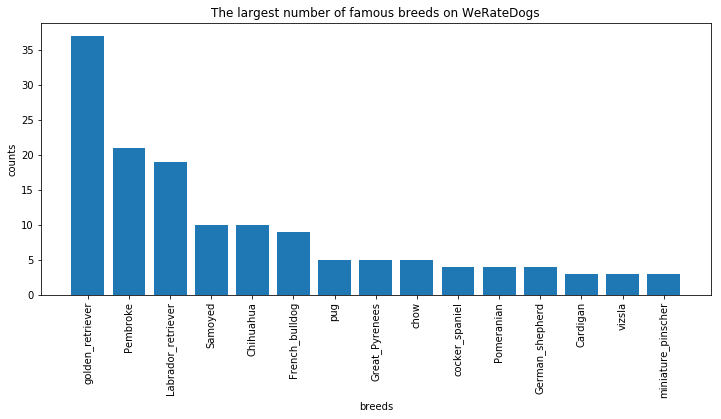

In [68]:
plt.figure(figsize=(12,5));
plt.bar(x=series_famous_breeds[:15].index, height=series_famous_breeds[:15]);
plt.xlabel('breeds')
plt.ylabel('counts')
plt.title('The largest number of famous breeds on WeRateDogs')
plt.xticks(rotation=90);

In this case, there are much more Golden retriever than other breeds too. The next many breeds are Pembroke, Labrador retriever, and Chihuahua as like above

In [69]:
df_twit_archive.stage.value_counts()

                 1666
pupper            203
doggo              63
                 ... 
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, Length: 8, dtype: int64

There are 1666 pupper, 203 doggo.

# Store Dataset

combined and cleaned data to csv file

In [70]:
df_twit_archive.to_csv('df_twit_archive_master', index=True)